In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
import numpy as np
import pandas as pd

# Anomaly Detection

In [ ]:
df_train = pd.read_excel('/content/x_train.xlsx')

df_test = pd.read_excel('/content/x_test.xlsx')


In [ ]:
df_train.head()

,Junc 10,Junc 11,Junc 12,Junc 13,Junc 21,Junc 22,Junc 23,Junc 31,Junc 32
0,111.07,110.90,115.38,116.56,113.70,115.94,118.04,112.15,107.41
1,130.28,122.37,121.40,122.23,120.13,121.88,123.82,117.13,111.89
2,119.99,110.67,108.43,109.34,107.60,109.12,111.03,104.55,99.24
3,130.28,122.37,121.40,122.23,120.13,121.88,123.82,117.13,111.89
4,128.59,120.45,118.35,119.99,118.94,120.07,122.05,117.15,112.09


In [ ]:
df_test.head()

,Junc 10,Junc 11,Junc 12,Junc 13,Junc 21,Junc 22,Junc 23,Junc 31,Junc 32
0,121.26,112.11,116.94,118.08,115.10,117.40,119.51,113.57,108.85
1,121.17,112.02,115.50,116.39,113.54,115.71,117.77,111.35,106.43
2,123.80,115.01,114.84,113.58,107.14,109.52,111.69,82.28,17.35
3,123.80,115.01,114.84,113.58,107.14,109.52,111.69,82.28,17.35
4,128.59,120.45,118.35,119.99,118.94,120.07,122.05,117.15,112.09


In [ ]:
df_train.rename(columns = {'Junc 10': 0, 'Junc 11' : 1, 'Junc 12': 2, 'Junc 13': 3, 'Junc 21' : 4, 'Junc 22' : 5,
       'Junc 23' : 6, 'Junc 31' : 7, 'Junc 32' : 8}, inplace = True)
df_test.rename(columns = {'Junc 10': 0, 'Junc 11' : 1, 'Junc 12': 2, 'Junc 13': 3, 'Junc 21' : 4, 'Junc 22' : 5,
       'Junc 23' : 6, 'Junc 31' : 7, 'Junc 32' : 8}, inplace = True)

In [ ]:
df_test.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [ ]:
df_train.head()

,0,1,2,3,4,5,6,7,8
0,111.07,110.90,115.38,116.56,113.70,115.94,118.04,112.15,107.41
1,130.28,122.37,121.40,122.23,120.13,121.88,123.82,117.13,111.89
2,119.99,110.67,108.43,109.34,107.60,109.12,111.03,104.55,99.24
3,130.28,122.37,121.40,122.23,120.13,121.88,123.82,117.13,111.89
4,128.59,120.45,118.35,119.99,118.94,120.07,122.05,117.15,112.09


In [ ]:
df_test.head()

,0,1,2,3,4,5,6,7,8
0,121.26,112.11,116.94,118.08,115.10,117.40,119.51,113.57,108.85
1,121.17,112.02,115.50,116.39,113.54,115.71,117.77,111.35,106.43
2,123.80,115.01,114.84,113.58,107.14,109.52,111.69,82.28,17.35
3,123.80,115.01,114.84,113.58,107.14,109.52,111.69,82.28,17.35
4,128.59,120.45,118.35,119.99,118.94,120.07,122.05,117.15,112.09


In [ ]:
import pandas as pd
import numpy as np


# Function to modify one column randomly with a difference greater than 100%
def modify_random_column(row):
    column_to_modify = np.random.choice(df_train.columns)
    original_value = row[column_to_modify]

    modified_value = original_value* random.choice([np.random.uniform(0,0.2), np.random.uniform(2,3)])
    row[column_to_modify] = modified_value
    return column_to_modify

# Create a new column 'modified_junction' and apply the modification function to each row
df_train['label'] = df_train.apply(modify_random_column, axis=1)

# Shuffle the dataset
df_train = df_train.sample(frac=1).reset_index(drop=True)

# Display the modified dataset
print(df_train)


              0           1       2           3       4       5       6  \
0    130.280000  122.370000  121.40  343.524272  120.13  121.88  123.82   
1    128.590000  120.450000  118.35  119.990000  118.94  120.07  122.05   
2    116.090000  106.250000  110.70  111.040000  107.62  109.92  111.96   
3      6.483942  112.320000  113.58  111.810000   96.40  106.72  108.91   
4    127.540000   21.109546  117.02  118.670000  117.66  118.76  120.74   
..          ...         ...     ...         ...     ...     ...     ...   
512  127.540000  119.260000  117.02  118.670000  117.66  118.76  120.74   
513  117.020000  107.300000  112.70  113.390000  109.94  112.37  114.47   
514  129.250000  121.200000  119.63  120.910000  119.35  120.82  122.78   
515  118.900000  109.440000  110.90  230.598033   90.61  102.90  105.11   
516  311.041607  121.200000  119.63  120.910000  119.35  120.82  122.78   

              7           8  label  
0    117.130000  111.890000      3  
1    117.150000   16.3965

In [ ]:
df_train.head()


,0,1,2,3,4,5,6,7,8,label
0,130.280000,122.370000,121.40,343.524272,120.13,121.88,123.82,117.130000,111.890000,3
1,128.590000,120.450000,118.35,119.990000,118.94,120.07,122.05,117.150000,16.396519,8
2,116.090000,106.250000,110.70,111.040000,107.62,109.92,111.96,7.866508,99.650000,7
3,6.483942,112.320000,113.58,111.810000,96.40,106.72,108.91,95.070000,90.940000,0
4,127.540000,21.109546,117.02,118.670000,117.66,118.76,120.74,115.860000,110.790000,1


In [ ]:


def modify_random_column(row):
    column_to_modify = np.random.choice(df_test.columns)
    original_value = row[column_to_modify]

    modified_value = original_value* random.choice([np.random.uniform(0,0.2), np.random.uniform(2,3)])
    row[column_to_modify] = modified_value
    return column_to_modify

# Create a new column 'modified_junction' and apply the modification function to each row
df_test['label'] = df_test.apply(modify_random_column, axis=1)

# Shuffle the dataset
df_test = df_test.sample(frac=1).reset_index(drop=True)


In [ ]:
df_test.head()

,0,1,2,3,4,5,6,7,8,label
0,130.280000,122.37,121.40,122.230000,120.13,121.880000,123.82,16.868202,111.89000,7
1,129.960000,122.01,120.53,121.800000,120.21,1.564981,123.67,117.880000,112.76000,5
2,8.620323,113.93,114.08,110.670000,103.26,100.810000,103.32,99.990000,93.41000,0
3,128.590000,120.45,118.35,119.990000,118.94,120.070000,122.05,117.150000,9.54537,8
4,113.730000,111.04,114.41,21.792881,111.74,113.930000,115.95,108.840000,103.72000,3


In [ ]:
label_counts = df_train['label'].value_counts()

# Display the counts
print(label_counts)

6    68
4    66
1    62
7    57
3    55
2    55
8    54
5    51
0    49
Name: label, dtype: int64


In [ ]:
# Extract features (x_train)
x_train = df_train.iloc[:, :-1]

# Extract labels (y_train)
y_train = df_train['label']

In [ ]:
# Extract features (x_train)
x_test = df_test.iloc[:, :-1]

# Extract labels (y_train)
y_test = df_test['label']

In [ ]:
x_train

,0,1,2,3,4,5,6,7,8
0,306.822551,118.22,117.130000,117.47,113.140000,115.310000,117.470000,96.620000,49.38
1,127.540000,119.26,117.020000,118.67,11.672782,118.760000,120.740000,115.860000,110.79
2,123.250000,114.37,114.780000,113.26,103.850000,108.690000,16.085470,48.480000,60.75
3,130.280000,122.37,121.400000,122.23,120.130000,121.880000,293.959803,117.130000,111.89
4,129.250000,121.20,119.630000,120.91,21.257881,120.820000,122.780000,117.010000,111.89
...,...,...,...,...,...,...,...,...,...
512,129.250000,121.20,119.630000,120.91,119.350000,120.820000,122.780000,4.695207,111.89
513,124.510000,115.81,113.650000,114.96,113.570000,114.920000,330.972409,111.200000,106.05
514,127.540000,119.26,117.020000,118.67,117.660000,118.760000,251.423173,115.860000,110.79
515,121.390000,112.27,112.850000,108.09,98.730000,13.796723,97.580000,95.080000,87.80


In [ ]:
y_train

0      0
1      4
2      6
3      6
4      4
      ..
512    7
513    6
514    6
515    5
516    2
Name: label, Length: 517, dtype: int64

In [ ]:
x_train = torch.tensor(x_train.to_numpy(), dtype=torch.float32)
x_test = torch.tensor(x_test.to_numpy(), dtype=torch.float32)


In [ ]:
y_train = torch.Tensor(y_train.values).long()
y_test = torch.Tensor(y_test.values).long()

In [ ]:
x_test

tensor([[130.2800, 122.3700, 121.4000,  ..., 123.8200,  16.8682, 111.8900],
        [129.9600, 122.0100, 120.5300,  ..., 123.6700, 117.8800, 112.7600],
        [  8.6203, 113.9300, 114.0800,  ..., 103.3200,  99.9900,  93.4100],
        ...,
        [119.0900, 109.6500, 114.1000,  ...,   0.6685, 109.6100, 104.7100],
        [122.9100, 113.9900, 113.4800,  ..., 101.9100, 103.5800,  97.8300],
        [125.2700, 116.6800, 116.4600,  ..., 114.2200,  88.8400,  36.3600]])

In [ ]:
y_test

tensor([7, 5, 0, 8, 3, 5, 3, 8, 4, 1, 8, 0, 6, 4, 3, 5, 1, 4, 1, 6, 5, 1, 5, 1,
        6, 7, 6, 7, 8, 1, 8, 1, 1, 2, 8, 5, 5, 4, 5, 5, 2, 4, 7, 1, 4, 4, 5, 7,
        8, 2, 3, 3, 1, 3, 5, 5, 8, 7, 8, 7, 3, 1, 4, 7, 8, 5, 6, 8, 0, 0, 0, 2,
        3, 1, 2, 0, 2, 6, 6, 1, 1, 3, 8, 0, 6, 5, 5, 3, 0, 5, 5, 4, 8, 6, 7, 1,
        5, 5, 2, 2, 3, 7, 4, 6, 0, 3, 3, 7, 8, 1, 0, 4, 3, 6, 2, 3, 7, 2, 4, 3,
        0, 0, 3, 3, 3, 4, 4, 0, 6, 3, 5])

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
# Create a DataLoader for training and testing data
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

## FCC (Deep Learning)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


class FullyConnectedClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FullyConnectedClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x


In [ ]:
# Hyperparameters
input_size = x_train.shape[1]
hidden_size = 64
num_classes = 9
learning_rate = 0.01
num_epochs = 25

# Instantiate the fully connected model
fc_model = FullyConnectedClassifier(input_size, hidden_size, num_classes)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(fc_model.parameters(), lr=learning_rate)

In [ ]:
# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = fc_model(x_train)

    # Calculate loss
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print training statistics
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')



Epoch [5/25], Loss: 2.7818245887756348
Epoch [10/25], Loss: 1.2713083028793335
Epoch [15/25], Loss: 0.9292782545089722
Epoch [20/25], Loss: 0.6699355244636536
Epoch [25/25], Loss: 0.48306548595428467


Testing


In [ ]:
# Model evaluation on testing data
with torch.no_grad():
    fc_model.eval()
    predicted_labels = fc_model(x_test).argmax(dim=1)
    accuracy = (predicted_labels == y_test).sum().item() / len(y_test)
    print(f'Training Accuracy: {accuracy * 100:.2f}%')

Training Accuracy: 90.84%


In [ ]:
from sklearn.metrics import confusion_matrix


# Assuming y_true and y_pred are your ground truth and predicted labels
cm = confusion_matrix(y_test, predicted_labels)

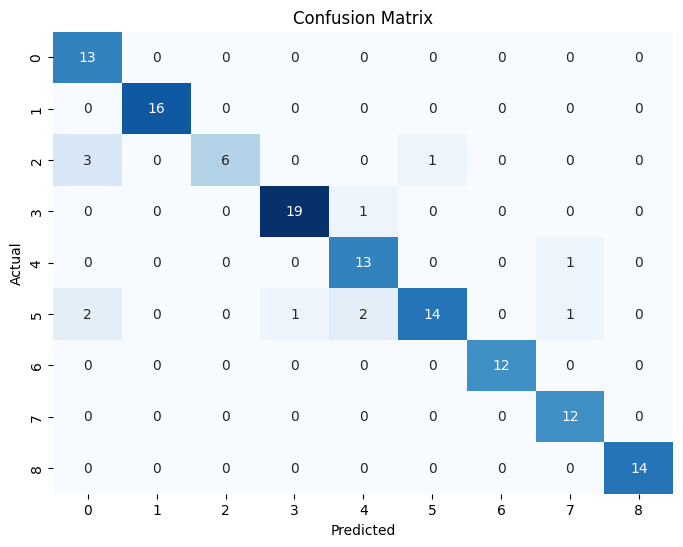

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()